In [1]:
import tensorflow as tf
from cprop_tf.cprop import CProp

In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images = train_images.astype(np.float32)
test_images = test_images.astype(np.float32)
train_images, test_images = train_images / 255.0, test_images / 255.0

In [7]:
def make_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [13]:
def run(use_cprop):
    opt = tf.keras.optimizers.Adam(lr=1e-3)
    if use_cprop:
        opt = CProp(opt, beta=0.999, c=1, cdf='bft')

    model = make_model()
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model.fit(train_images,
                     train_labels,
                     epochs=10,
                     validation_data=(test_images, test_labels))

In [14]:
history = {}

In [17]:
for use_cprop in [True, False]:
    history[use_cprop] = run(use_cprop)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 8s 162us/sample - loss: 1.4715 - accuracy: 0.4648 - val_loss: 1.1958 - val_accuracy: 0.5753
Epoch 2/10
50000/50000 [==============================] - 6s 128us/sample - loss: 1.0793 - accuracy: 0.6229 - val_loss: 1.0548 - val_accuracy: 0.6257
Epoch 3/10
50000/50000 [==============================] - 6s 129us/sample - loss: 0.9096 - accuracy: 0.6809 - val_loss: 0.8967 - val_accuracy: 0.6893
Epoch 4/10
50000/50000 [==============================] - 6s 129us/sample - loss: 0.7950 - accuracy: 0.7235 - val_loss: 0.9035 - val_accuracy: 0.6809
Epoch 5/10
50000/50000 [==============================] - 6s 129us/sample - loss: 0.7116 - accuracy: 0.7521 - val_loss: 0.8353 - val_accuracy: 0.7083
Epoch 6/10
50000/50000 [==============================] - 7s 132us/sample - loss: 0.6467 - accuracy: 0.7750 - val_loss: 0.8396 - val_accuracy: 0.7144
Epoch 7/10
50000/50000 [==========================

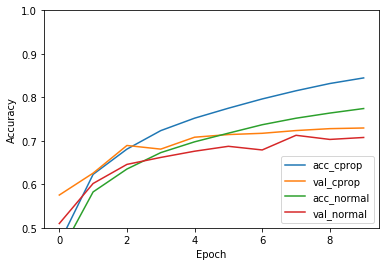

In [18]:
for use_cprop in [True, False]:
    name = 'cprop' if use_cprop else 'normal'
    plt.plot(history[use_cprop].history['accuracy'], label=f'acc_{name}')
    plt.plot(history[use_cprop].history['val_accuracy'], label=f'val_{name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    
plt.savefig('cifar10.png')